# 1 - Introducing the Dataset : KickStarter Projects

The dataset that I have been working on is the data of Kickstarter projects. What is kickstarter? Kickstarter.com is a big global funding community based on Brooklyn, New York. The company's mision is to "help bring worthy ideas to life" as they stated. It has nearly 160 employees. Since their launch, on April 28, 2009, 16 million people have backed a project, \$4.2 billion has been pledged, and 161,167 projects have been successfully funded in the areas such as film, music, fashion, video games. People who pledge to a project usually gets tangible rewards in exchange for their pledges.
![kick-logo.jpg](img/kick-logo.jpg)

This dataset is publicized on <a>kaggle.com</a>, in which there are many other datasets to be used for data analysing practices as well. I used Python 3 language to analyze this dataset, since it is quite popular among data scientists and it is easy to learn.<br><br> Let's take a look at the dataset first. To do that, we need to import the required modules from Python. Then, using the Pandas module, we can now read the data that is in the form of .csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("ks-projects-201801.csv")
data = data.drop(['ID','usd pledged','usd_goal_real','usd_pledged_real'],1)
successful = data.loc[data.state=='successful']
print("The dataset:")
data.head(10)

The dataset:


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US
5,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US
6,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US
7,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US
8,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US
9,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US


There are  378,661 different projects with 15 different categories given in this dataset. The oldest project was publicized in 2009 and the newest one was in 2018.<br> <br>
<b>Description of the Columns:</b>
<table style="width: 100%; text-align: left;">
    <tr >
        <th style="text-align: left;">Name:</th>
        <td>Name of the project</td>
    </tr>
    <tr>
        <th style="text-align: left;">Category:</th>
        <td>Specific category of the project.</td>
    </tr>
    <tr>
        <th style="text-align: left;">Main Category:</th>
        <td>General area of the project.</td>
    </tr>
    <tr>
        <th style="text-align: left;">Currency:</th>
        <td>Currency type that has been pledged to the project.</td>
    </tr>
    <tr>
        <th style="text-align: left;">Deadline:</th>
        <td>Deadline of the project's campaign on kickstarter.</td>
    </tr>
    <tr>
        <th style="text-align: left;">Goal:</th>
        <td>Targeted pledge of the project.</td>
    </tr>
    <tr>
        <th style="text-align: left;">Launched:</th>
        <td>The date that the project's campaign started on kickstarter.</td>
    </tr>
    <tr>
        <th style="text-align: left;">Pledged:</th>
        <td>Amount of the money that has been pledged.</td>
    </tr>
    <tr>
        <th style="text-align: left;">State:</th>
        <td>Status quo of the project.</td>
    </tr>
    <tr>
        <th style="text-align: left;">Backers:</th>
        <td>Number of the people that pledged to the project.</td>
    </tr>
    <tr>
        <th style="text-align: left;">Country:</th>
        <td>Origin of the project.</td>
    </tr>
</table>

<h2>Number of projects in each category</h2>

Text(0.5, 1.0, 'Number of projects in each category')

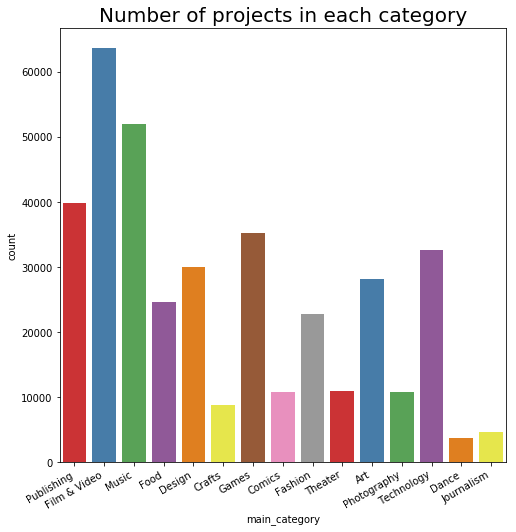

In [6]:
import seaborn as sns
plt.figure(figsize = (8,8))
g = sns.countplot(x="main_category",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha="right")
g 
plt.title('Number of projects in each category',size = 20)

<hr>

# 2 - Objective and the Algorithms

Our objective is to predict the <b>state</b> of a project, whether if it will fail or be successfull, based on the features that are given in the dataset, using machine learning algorithms. The features we are going to use at first is, <b>main_category, goal, pledged</b> and <b>backers</b>. These columns' values will be the independent variables where the <b>state</b> column will be the only dependent variable.

In [98]:
data.head(5)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US


<br><br><h3>The algorithms which we are going to use:</h3>
<table  align="left">
    <tr>
        <th  style="text-align: left;">Decision Trees</th>
    </tr>
    <tr >
        <th style="text-align: left;">Support Vector Machine</th>
    </tr>
    <tr >
        <th style="text-align: left;">Logistic Regression</th>
    </tr>
</table>

# Decision Tree

Decision tree algorithm is a non-parametric data modelling algorithm that basically uses divide-and-conquer strategy. It is a classification algorithm so it is also called <b>Classification Tree</b>. Decision trees are used to separate the dataset into classes belonging to the response variable.
<br>A decision tree is formed of two types of nodes: <br> 1- Decision functions which returns yes or no as output <br> 2-  Leaves which are terminal nodes.<br>

Simple decision tree example where $X_i$ are attributes and $C_i$'s are classes:
![dt_pic2.PNG](img/dt_pic2.PNG)
(source: The Elements of Statistical Learning - Robert Tibshirani)

Imagine we have data of 14 days that shows weather conditions and the Golf Player's decision of play, shown below:

In [17]:
import pandas as pd
pd.read_csv("golfy.csv",delimiter=";")

,Outlook,Humidity,Wind,Play
0,sunny,high,weak,no
1,sunny,high,strong,no
2,overcast,high,weak,yes
3,rain,high,weak,yes
4,rain,normal,weak,yes
5,rain,normal,strong,no
6,overcast,normal,strong,yes
7,sunny,high,weak,no
8,sunny,normal,weak,yes
9,rain,normal,weak,yes


Assume that we are trying to predict whether the player is going to play or not on 15th day if the weather is <br><b>Outlook:</b> Rain <br> <b>Humidity:</b> High <br> <b>Wind:</b> Weak  

To build the tree, we need to use the core algorithm of decision tree which does most of the divide-and-conquer job.<br> That algorithm is called <b>ID3 (Iterative Dichotomiser 3). </b>Developed by J. R. Quinlan. <br>ID3 algorithm helps us find which attribute is more informative and then split if necessary. <br>
<h3>Steps of ID3 Algorithm:</h3> <br>
1 - Find the most informative attribute of the data, call it decision attribute and make it the root node <br>
2 - Split it and create new child nodes for each value of decision attribute <br>
3 - Distribute the training data to child nodes <br>
4 - For each child node: <br>
    if, subset is <b>pure</b> : STOP <br>
    else, create new node from child nodes.
<hr>

<h2>How do we find the most informative attribute ?</h2>

As we are going to split the most informative attribute first, as the root node, the basic idea is, somehow we need to measure the purity of the subset which we obtained by splitting that attribute. So ideally, we need to pick such an attribute that has purest subsets. Suppose we are looking into a particular subset, after we have splited the data, how uncertain we are whether a random item from that subset is positive or negative?

For example:
![wind.png](img/wind.png) Consider the attribute <b>Wind</b> as the root node, the days when wind is weak, player played golf on 6 of those days and didn't play on 2 of those days. When wind is strong, it is 3 days of yes and 3 days of no which is a complete uncertainity. Subsets are not pure as we can see. But how do we measure purity?

<h2>Entropy</h2>

It is a way to measure the uncertainity (or purity) of a class in a subset of examples. Entropy denoted by E (and sometimes H) gives a number between 0 and 1, where 0 is certain and 1 is totally uncertain.

$$E(S) = \sum_{i=1}^c - p_i\log_2(p_i)$$

Where $p_i$ is the probability of a class in the data. <br> $S$: Subset of training examples. <br> $c$: Classes <br> So, if we go back to the subsets we obtained from Wind attribute, entropy of <b>weak wind</b> subset is:

$$ -\dfrac{6}{8}log_2\dfrac{6}{8} - \dfrac{2}{8}log_2\dfrac{2}{8}\approx0,80$$ <br><br>where 6 yes / 2 no on the days where wind is weak. Entropy of <b>strong wind</b> subset is: <br><br> <br>
$$ -\dfrac{3}{6}log_2\dfrac{3}{6} - \dfrac{3}{6}log_2\dfrac{3}{6}=1$$

Graph of Entropy:![entropy2.png](img/entropy2.png) (source: Data Science for Business - Foster Provost & Tom Fawcett) 

After calculating Entropy of subsets, we need to decide which attribute is informative most. This is where we need to use <b>Information Gain </b> formula:

$$Gain(T,X) = E(T) - E(T,X)$$

where X stands for attributes and T is the target set. If we go back to our example, we need to calculate all three Information Gain for each attributes and then decide our root node with the highest Information Gain:<br><br>
$$Gain(Play,Outlook) = E(Play) - E(Play,Outlook)$$ <br>
$$Gain(Play,Humidity) = E(Play) - E(Play,Humidity)$$ <br>
$$Gain(Play,Wind) = E(Play) - E(Play,Wind)$$<br>

Let's calculate the <b>Information Gain</b> for the <b>Wind</b> attribute to visualize the step:<br><br>$$Gain(Play,Wind) = E(Play) - E(Play,Wind)$$<br><br>
$$E(Play) = -\dfrac{5}{14}log_2\dfrac{5}{14} - \dfrac{9}{14}log_2\dfrac{9}{14}\approx 0,94$$ <br><br>
$$E(Play, Wind) = P(Wind_{Weak})\times E(Wind_{Weak}) + P(Wind_{Strong})\times E(Wind_{Strong}) $$ <br><br>
$$E(Play,Wind) = \dfrac{8}{14}\times 0,80 + \dfrac{6}{14}\times 1\approx 0,88$$<br><br>
$${Gain(Play,Wind) = 0,94 - 0,88 = 0.06}$$

The attribute with the highest Gain is going to be the root node of the tree. If we calculate the Information Gain for all the attributes in our example, we can see that <b>Outlook</b> attribute has the largest Information Gain. So it is going to be the root node. When we complete the steps of ID3 algorithm, we would have a tree like below:

![tree.png](img/tree.png)

After creating the tree, let's recall what we are trying to predict:
<br><b>Outlook:</b> Rain <br> <b>Humidity:</b> High <br> <b>Wind:</b> Weak <br><b>Play :</b> ? <br>
We can see that our data has a path: <br> <b>Outlook</b> --> <b>Rain</b> --> <b>Weak</b> --> <b>Play : YES</b>

# Applying DecisionTree to our Kickstarter Dataset

First, we need to import the python modules that we need to build our model.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import chardet
from sklearn.model_selection import train_test_split

Then, we read our csv formetted data with Pandas module and drop the unnecessary attributes.

In [2]:
data = pd.read_csv("ks-projects-201801.csv")
data = data.drop(['ID','usd pledged','usd_goal_real','usd_pledged_real'],1)
data.head(5)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US


We assign our independent columns (main_category , goal , pledged , backers) to a new dataframe <b>x_data</b>

In [2]:
x_data = data.iloc[:, [2,5,7,9]] 
x_data.head()

,main_category,goal,pledged,backers
0,Publishing,1000.0,0.0,0
1,Film & Video,30000.0,2421.0,15
2,Film & Video,45000.0,220.0,3
3,Music,5000.0,1.0,1
4,Film & Video,19500.0,1283.0,14


We need to convert string data inside the state column to numerical data. So we will assign as:
<table align="left" style="width: 50%;">
    <tr>
        <th style="text-align: left;">Successful or Live</th>
        <td>1</td>
    </tr>
    <tr>
        <th style="text-align: left;">Other values (cancelled, failed etc.)</th>
        <td>0</td>
    </tr>
</table>

In [3]:
#x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))
data.state = ["successful" if each == "live" else each for each in data.state]  
data.state = [1 if each == "successful" else 0 for each in data.state]          
y = data.iloc[:,8]

We also need to convert categorical values of main category feature, but this time, instead of representing each value with a number, each value will be represented by a vector such that its related element will be 1 while the rest will be 0. This process is called <b>one hot encoding</b>. After this process, we will have a new dataset such as below:

In [4]:
df = pd.DataFrame(x_data.iloc[:,0])
categories = pd.get_dummies(df)
for i in categories.columns:
    x_data.insert(loc=1, column=i, value=categories[i])
x_data = x_data.drop(["main_category"],1)
x_data.head(10)

,main_category_Theater,main_category_Technology,main_category_Publishing,main_category_Photography,main_category_Music,main_category_Journalism,main_category_Games,main_category_Food,main_category_Film & Video,main_category_Fashion,main_category_Design,main_category_Dance,main_category_Crafts,main_category_Comics,main_category_Art,goal,pledged,backers
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1000.0,0.00,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,30000.0,2421.00,15
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,45000.0,220.00,3
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5000.0,1.00,1
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,19500.0,1283.00,14
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,50000.0,52375.00,224
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1000.0,1205.00,16
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,25000.0,453.00,40
8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,125000.0,8233.00,58
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,65000.0,6240.57,43


Now we are ready to split the data into test and train parts and run decision tree algorithm. Here our test data will be 75% of the whole dataset, in other words, we will use 25% of the dataset to train our model and then predict other %75. We will run the algorithm 20 times and save the scores inside a python list, then build a histogram of these prediction scores.

In [36]:
scores = list()
for i in range(1,20):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.75)
    tree = DecisionTreeClassifier()
    tree.fit(x_train,y_train)
    y_pred = tree.predict(x_test)
    from sklearn.metrics import confusion_matrix  
    cm = confusion_matrix(y_test, y_pred)
    scores.append(tree.score(x_test,y_test))

<h3>Confusion Matrix</h3> <br>

A confusion matrix $C$ is such that  $ C_{i,j} $ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$. Therefore, the count of true negatives is $ C_{0,0} $, false negatives which is also called <b>Type II Error</b> is $ C_{1,0} $, true positives is $ C_{1,1} $ and false positives which is also called to <b>Type I Error</b> is $ C_{0,1} $. <br>
![cms.png](img/cms.png)
<br><br>
For our case, confusion matrix according to the prediction from last iteration is:

In [66]:
cm = confusion_matrix(y_test,y_pred, labels=[0,1])
print("\t\t  Predicted\n                 0         1\n Actual   0   {} \n\t  1   {}".format(cm[0], cm[1]))

		  Predicted
                 0         1
 Actual   0   [178874   2560] 
	  1   [ 2895 99667]


<h2>Evaluating Model's Performance</h2>

As we train our classification model, we would like to assess how good it is. Mostly, Pythons's sci-kit learn library provides built-in functions for analyzing the performance of models. Most common 4 types of metrics for evaluating a model's performance are:
<table align="left" style="width: 20%;">
    <tr>
        <th style="text-align: left;">1 - Accuracy</th>
        <td></td>
    </tr>
    <tr>
        <th style="text-align: left;">2 - Recall</th>
        <td></td>
    </tr>
    <tr>
        <th style="text-align: left;">3 - Precision</th>
        <td></td>
    </tr>
    <tr>
        <th style="text-align: left;">4 - F1 Score</th>
        <td></td>
    </tr>
</table>

<h3>1 - Accuracy</h3><br>
It is simply the ratio of correct predictions to total observations.<br><br>
$\dfrac {C_{0,0} + C_{1,1}}{C_{0,0} + C_{1,1} + C_{0,1} + C_{1,0}}$ or $\dfrac {True Negative + True Positive}{TotalObservations}$

Accuracy Score for our model:

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9807919829856758

<h3>2 - Recall</h3><br><br>
Recall is the ratio of correctly predicted positive observations to the all positive observations.<br><br>
$\dfrac{C_{1,1}}{C_{1,1} + C_{1,0}}$ or $\dfrac{TruePositive}{TotalActualPositive}$

Recall Score for our model:

In [69]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.9717731713500126

<h3>3 - Precision</h3><br><br>
Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.<br><br>
$\dfrac{C_{1,1}}{C_{1,1} + C_{0,1}}$ or $\dfrac{TruePositive}{TruePositive + FalsePositive}$

Precision Score for our model:

In [70]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.9749576921948213

<h3>4 - F1 Score</h3><br><br>
F1 score is a function of precision and recall. F1 is usually more useful when distrubution of classes are uneven.<br><br>
$F1_{Score} = 2\times \dfrac{Recall\times Precision}{Recall + Precision}$

F1 Score for our model:

In [72]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.9733628271049715

<h3>Histogram of the accuracy scores after 20 iteration: </h3>

Text(0.5, 1.0, 'Accuracy Histogram')

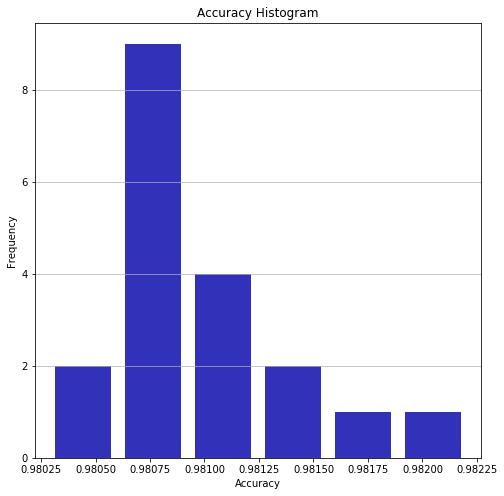

In [77]:
plt.figure(figsize=(8,8))
plt.hist(scores, bins='auto', color='#0504aa', alpha=0.82, rwidth=0.80)                           
plt.grid(axis='y', alpha=0.90)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Accuracy Histogram')

We can see that our decision tree model has a very good approximate score, around $0.98$, at predicting the state of projects in the test data.

<hr>

# Logistic Regression Algorithm

Logistic regression is one of the most famous machine learning algorithms. It is a classification algorithm which is similar to the linear regression in a lot of ways but the main difference is Logistic Regression is used for binary classification of the problems while linear regression is used to predict particular values. Assume we have a training dataset of cancer cells, where some of the cells are benign and some of them are malignant. 

![lin1.png](img/lin1.png)

One thing we can do to this given training dataset is to apply linear regression algorithm and try to fit a straight line. After doing that, we get a line like $(2)$![lin2.png](img/lin2.png) When we want to make predictions we could try threshold the classifier output at 0,5. Then, if the hypothesis outputs a value greater than 0,5 we predict $y=1$ and if it is less than 0,5 we predict $y=0$ $(3)$ ![lin3.png](img/lin3.png) In this particular example, it seems like linear regression is acctually doing something reasonable even though this is a classification problem. But now, let's try changing the problem a bit and add one more training example to dataset.

![lin4.png](img/lin4.png) Once we added that extra example here and run linear regression, we would have a new straight line like $(4)$. If we threshold this hypothesis at 0,5 we end up with a decision boundary around $(5)$. This seems a pretty bad model for linear regression to do. Somehow adding that example there cause linear regression to change the line it fits to the training set from $(3)$ to $(5)$ and caused it to give us a worse hypothesis. Therefore, applying liinear regression to a classification problem usually isn't often a good idea.In this case, we will use a new algorithm, Logistic Regression which has the property that the output of the predictions are always between $0$ and $1$. We would like to find a continous hypothesis function $h(x)$ that satisfies $0\leq h(x) \leq 1$. When we were using Linear Regression algorithm, form of the hypothesis was like $h_\theta (x) = \theta^T x$ for linear regression, we will modify this form a bit. <br> <br>
$$h_\theta (x) = g(\theta^T x) \qquad,\qquad g(z) = \frac{1}{1 + e^{-z}}$$
<br><br>




$$\Longrightarrow h_\theta(x) = \frac{1}{1 + e^{-{\theta^T x}}}$$ 
<br> <br>
where $g(z)$ is also called <b>Sigmoid Function</b>(Logistic Function) and has a graph like below:![sigmoid.png](img/sigmoid.png)<br><br>
(source: https://ayearofai.com/rohan-1-when-would-i-even-use-a-quadratic-equation-in-the-real-world-13f379edab3b)<br><br>

By deciding the values of theta, we get a better predictions from that decision boundary.
![sig_func2.png](img/sig_func2.png)

# How do we choose parameters $\theta$ ?

The goal of learning in machine learning  is basiccally to estimate parameters in order to make predictions. Like how the least squares method is used to estimate parameters in Linear Regression and fit a hypothesis, Logistic Regression uses the Maximum Likelihood Method for estimating parameters. Suppose we have a training set $${(x_1,y_1),(x_2,y_2),....,(x_k,y_k)}$$ <br>with k examples and labels are either $y=0$ or $y=1$. <br><br>



For the samples labelled 1: We need to estimate ${\theta}$ such that ${\frac{1}{1 + e^-{{\theta}^{T} x}}}$ is as close to 1 as possible. (or $\prod p(x_i)$ as close to 1 as possible)<br><br>

For the samples labelled 0: We need to estimate $\theta$ such that $${1-\frac{1}{1 + e^-{{\theta}^{T} x}}}$$ is as close to 1 as possible. (or $\prod (1 - p(x_i))$ as close to 1 as possible) <br> where $x_i$ is the feature vector for $i^{th}$ sample. <br> With the requirements we obtain, we want to find $\theta$ parameters such that:<br><br> $$L(\theta) = \prod_{s \in y_i=1} p(x_i) \times \prod_{s \in y_i = 0}(1-p(x_i)) $$ <br><br> is maximum. <br>

This function we need to optimize is called the likelihood function. If we combine the products:<br><br>
$$L(\theta) = \prod p(x_i)^{y_i} \times (1 - p( x_i))^{1-y_i}$$ <br><br>
and then take the loglikelihood and convert it into a summation:<br><br>
$$l(\theta) = \sum_{i=1}^{k}y_i \log (p(x_i)) + (1-y_i)\log (1-p(x_i))$$ <br><br>
where $l$ represents log(likelihood). If we substitute $p(x_i)$ with $\frac{1}{1 + e^{\theta x_i}}$ we would have:<br><br>
$$\Longrightarrow l(\theta) = \sum_{i=1}^{k}y_i \log \left(\frac{1}{1 + e^{-\theta x_i}}\right) + (1 - y_i) \log \left(\frac{e^{\theta x_i}}{1 + e^{-\theta x_i}}\right)$$ <br><br>
$$\Longrightarrow l(\theta) = \sum_{i=1}^{k}y_i \left[\log \left(\frac{1}{1 + e^{-\theta x_i}}\right) - \log \left(\frac{e^{-\theta x_i}}{1 + e^{\theta x_i}}\right)\right] + \log (\frac{e^{\theta x_i}}{1 + e^{\theta x_i}}) $$
<br><br>
$$\Longrightarrow l(\theta) = \sum_{i=1}^{k}y_i \left [ \log (e^{\theta x_i}) \right ] + log \left( \frac{e^{\theta x_i}}{1 + e^{\theta x_i}} \times \frac {e^{\theta x_i}}{e^{\theta x_i}} \right)$$ <br><br>
$$\Longrightarrow l(\theta) = \sum_{i=1}^{k}y_i \theta x_i + \log \left( \frac{1}{1 + e^{\theta x_i}}\right)$$ <br><br>

and we end up with the final form of log-likelihood function as: <br><br>
$$\boxed{ l(\theta) = \sum_{i=1}^{k}y_i \theta x_i - \log \left({1 + e^{\theta x_i}}\right) }$$ <br><br>
the value of $\theta$ that maximizes this function is found by numerical methods.(for example Newton-Ramphson method or gradient descent method) 

<h1>Decision Boundary</h1> <br><br>
Suppose our hypothesis is:
$$h_\theta(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2)$$
$$y \in {0,1}$$
for the given training dataset below:

![lin5.png](img/lin5.png)
After maximizing the likelihood function, we obtain $\theta = 
\left [ \begin{matrix} 
-3 \\
1 \\
1 
\end{matrix} \right ]$. Since now we know $\theta$ , let's try to figure out where our hypothesis will end up predicting $y=1$ and where it would end up predicting $y=0$. <br><br>We know that $y=1$ is more likely that is the probability that $y=1$ is greater than or equal to $0.5$ whenever $\theta^T x \geq 0$ and: <br><br>  $-3 + x_1 + x_2  = \theta^T x$ where $\theta = 
\left [ \begin{matrix} 
-3 \\
1 \\
1 
\end{matrix} \right ]$ <br> <br>
So, for any example with features $x_1$ and $x_2$ that satisfy $-3 + x_1 + x_2 \geq 0$, our hypothesis will predict that $y=1$. We can also move $-3$ to the other side and rewrite the equations as $x_1 + x_2 \geq 3$. <br>
Now let's see what that means in the figure. If we write down the equation $x_1 + x_2 = 3$ , this defines an equation of a straight line and if we draw it on the figure, it is going to be like:
![lin6.png](img/lin6.png)
So everything to the upper right portion of the line is the region where our hypothesis will predict $y=1$. <br>
Decision boundry is a property of the hypothesis including the parameters $\theta_0$,$\theta_1$,$\theta_2$ and <b>not</b> the dataset. We use training set to determine the values of the parameters, and then fit the decision boundary using those values.

<hr>

# Applying logistic regression algorithm to our Kickstarter dataset:

We have our dependent and independent columns which we have one hot encoded and normalized earlier.

Before we continue, we need to <b>normalize</b> the data. The goal of normalization is to make every datapoint have the same scale so each feature is equally important. After normalization, features will be scaled between $[0,1]$. We will normalize the data using linear scaling method: <br> <br>
$$x_{normalized} = \frac { x_{real} - x_{min} } { x_{max} - x_{min} } $$

In [6]:
x_data.iloc[:,[15,16,17]]  = (x_data.iloc[:,[15,16,17]] - np.min(x_data.iloc[:,[15,16,17]]))/(np.max(x_data.iloc[:,[15,16,17]]) - np.min(x_data.iloc[:,[15,16,17]]))
x_data.head()

,main_category_Theater,main_category_Technology,main_category_Publishing,main_category_Photography,main_category_Music,main_category_Journalism,main_category_Games,main_category_Food,main_category_Film & Video,main_category_Fashion,main_category_Design,main_category_Dance,main_category_Crafts,main_category_Comics,main_category_Art,goal,pledged,backers
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000010,0.000000e+00,0.000000
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000300,1.190325e-04,0.000068
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000450,1.081666e-05,0.000014
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000050,4.916666e-08,0.000005
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000195,6.308082e-05,0.000064


We again, split our data into test and train pieces. This time, let's reserve 20% of our data for training. Then we need to import Logistic Regression module of python. When we run the alogrithm for 10 times:

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
lgr = LogisticRegression(random_state=0)
scores = list()
for i in range(1,10):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y, train_size=0.20)
    lgr.fit(x_train,y_train)
    y_pred = lgr.predict(x_test)
    scores.append(lgr.score(x_test,y_test))
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    print("Accuracy Score: \n" + str(i) + " " +  str(scores[i-1]))

Accuracy Score: 
1 0.6515289061133137
Accuracy Score: 
2 0.6534006318312212
Accuracy Score: 
3 0.6528394442262048
Accuracy Score: 
4 0.6524565162133701
Accuracy Score: 
5 0.652753615533673
Accuracy Score: 
6 0.6522716544140706
Accuracy Score: 
7 0.6521495135823906
Accuracy Score: 
8 0.6521660191001852
Accuracy Score: 
9 0.6520372760613873


<h3>Confusion Matrix:</h3>

In [22]:
print(cm)

[[184970   8502]
 [ 96906  12551]]


Logistic regression has made only 65% accuracy with this dataset. When the data is highly non-linear logistic regression cannot predict values correctly as we can see.

Let's take a look at the pledged and goal graph of the projects where orange points are successful projects and blue ones are failed projects:

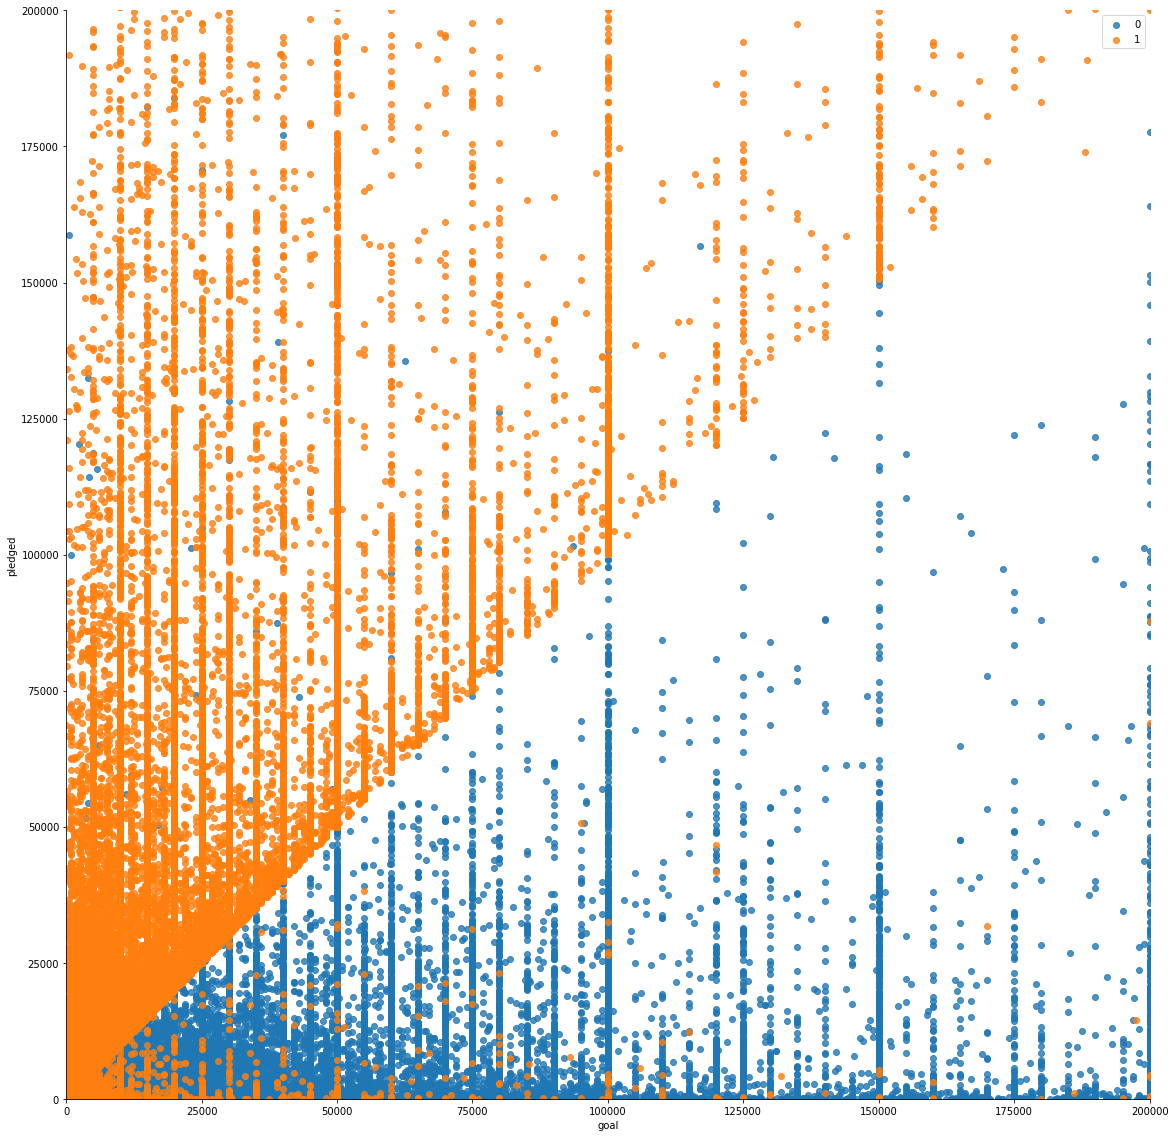

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

lm = sns.lmplot( x="goal", y="pledged", data=data, fit_reg=False, hue='state', legend=False, height=16, aspect=1,scatter_kws={'alpha':0.80})
lm.set(ylim=(0, 200000))
lm.set(xlim=(0, 200000))
plt.legend(loc='upper right')
plt.show()

# Support Vector Machine Algorithm

Support vector machine or SVM in short is a classification algorithm. It basicaly fits a hyperplane to separate data points as wide as possible. <br> <br>Simple Hyperplane Example :
![SVM.png](img/SVM.png)

Suppose we are given plot of two label classes. We need to fit a hyperplane such that it will siplit the classes with the <b>maximum margin</b> or <b>street</b> with maximum width.

Let <b>$\overline{\rm w}$</b> be a vector that is <b>perpendicular to the median line of the street with an unknown length</b>. For any data point <b>u</b>, to decide whether it is on the right side of the street or on the left side of the street, we <b>project</b> the vector $\overline{\rm u}$ to $\overline{\rm w}$ and observe if the projection is big enough to cross the median line of the street. If it is big enough to cross median line, it is green, if it is not big enough to cross the median line, it is red.
![svm2.png](img/svm2.png)
So, what we are looking for is if the inequality below is true or not: <br> <br>
$$\overline{\rm u} \bullet \overline{\rm w} \enspace\geq\enspace some\enspace constant\enspace C$$ <br><br>
or we can write
$$\overline{\rm u} \bullet \overline{\rm w} + b \enspace\geq\enspace 0$$<br><br> where $C = -b$,<br> we will consider this inequality as our, <br><br><h4>DECISION RULE:</h4> <br><br>
If   $\boxed{\overline{\rm u} \bullet \overline{\rm w} + b \enspace\geq\enspace 0}$ is true, then u is green.

What we don't know here is what constant $b$ to use and which $\overline{\rm w}$ to use either. We only know that $\overline{\rm w}$ needs to be perpendicular to the median line. Clearly, constraints here to fix a particular $b$ and $\overline{\rm w}$ are not enough. What we are going to do isto put forward some constraints in order to calculate a $b$ and a $\overline{\rm w}$. <br> Let's define two additional planes perpendicular to the median of the street:<br><br>
     $$(1) \qquad\enspace\boxed{ H_+:\enspace\overline{\rm w} \bullet \overline{\rm x} + b \enspace=1   \qquad
   \enspace\enspace H_-:\enspace\overline{\rm w} \bullet \overline{\rm x} + b \enspace=-1  }$$ <br><br> 
In order to combine these two equations into one and make life a little easier, we define:<br><br>

$$y_i = 
\begin{cases} 
      1 &,\enspace i = Green \\
      -1 &,\enspace i = Red \\
   \end{cases}
\
$$<br><br>
then we can write the equation below: <br><br>
$$ y_i(\overline{\rm x_i}\bullet \overline{\rm w} + b)\geq 1$$<br><center>or</center> <br>
$$(2)\qquad \boxed{y_i(\overline{\rm x_i}\bullet \overline{\rm w} + b)= 1}$$ <br><center>for $x_i$'s which are on $H_+$ or $H_-$</center>

Let's remember what our aim is: <br>
We are trying to put a line such that the street will seperate the green ones from red ones <b>as wide as possible</b>. <br>To formulate the width of the street, assume $x_+$ is a point on $H_+$ and $x_-$ is a point on $H_-$:

![svm3%282%29.png](img/svm3%282%29.png) <br><br>

We already know that $\overline{\rm w}$ is a normal vector to the median line. Therefore, we can calculate the width of the street as:<br><br>

$$Width=\frac{(\overline{\rm x_+} - \overline{\rm x_-})\bullet \overline{\rm w}}{||w||}$$ <br><br>
$$= \frac{\overline{\rm w}\bullet \overline{\rm x_+} - \overline{\rm w}\bullet \overline{\rm x_-}}{||w||} $$<br><br>
If we use the equation (2): <br><br>
$$(2)\qquad y_i(\overline{\rm w}\bullet \overline{\rm x_i} + b) = 1$$ <br>
<center>We know that $y_+ = 1$ and $y_- = -1$ so:</center> <br>
$$y_+(\overline{\rm w}\bullet \overline{\rm x_+} + b) = 1 \Longrightarrow 1(\overline{\rm w}\bullet \overline{\rm x_+} + b) = 1$$<br>
$$\Longrightarrow \overline{\rm w}\bullet \overline{\rm x_+} = 1-b$$ <br>
$$y_-(\overline{\rm w}\bullet \overline{\rm x_-} + b) = 1 \Longrightarrow -1(\overline{\rm w}\bullet \overline{\rm x_-} + b) = 1$$<br>
$$\Longrightarrow \overline{\rm w}\bullet \overline{\rm x_+} = -1-b $$ <br>
$$\Longrightarrow \overline{\rm w}\bullet \overline{\rm x_+} - \overline{\rm w}\bullet \overline{\rm x_-} = 1-b+b+1 = 2$$<br><br>
$$\Longrightarrow \boxed{Width=\frac{2}{||w||}}$$ <br>



So know we know that, we are trying to maximize $\frac{2}{||w||}$, which means we can minimize $||w||$ instead. Moreover, we can minimize $\frac{1}{2}||w||^2$ instead, which is mathematically convenient. <br>
$$min(\frac{1}{2}||w||^2)$$ <br>
Now we have an expression that we would like to find extremum of, and we have some constraints that we need to satisfy. Therefore, we need to use <b>Lagrange Multipliers</b> to solve this quadratic optimization problem.<br>
<br>

$$min \qquad L=\frac{1}{2}||w||^2 - \sum_{i=1}^{m} \alpha_i[y_i(\overline{\rm w}\bullet \overline{\rm x_i} + b)-1]$$ <br>
Since we are to find extremum, we use derivative:<br>
$$\frac{\partial L}{\partial \overline{\rm w}} = \overline{\rm w} - \sum_{i=1}^{m} \alpha_i y_i x_i = 0$$<br>
$$\Longrightarrow \boxed{ \overline{\rm w} = \sum_{i=1}^{m} \alpha_i y_i x_i} \qquad (*)$$ <br>
$$\frac{\partial L}{\partial b} = - \sum_{i=1}^{m} \alpha_i y_i = 0$$ <br>
$$\boxed{\sum_{i=1}^{m} \alpha_i y_i = 0}\qquad (**)$$<br>
If we substitute $(*)$ in L , we get: <br><br>
$$L = \frac{1}{2}\left(\sum_{i=1}^{m} \alpha_i y_i x_i\right)\bullet\left(\sum_{j=1}^{m} \alpha_j y_j x_j\right) - \left(\sum_{i=1}^{m} \alpha_i y_i x_i\right)\bullet\left(\sum_{j=1}^{m} \alpha_j y_j x_j\right) - \underbrace{\sum_{j=1}^{m} \alpha_i y_i b}_{0 \thinspace from \thinspace(**)} + \sum_{j=1}^{m} \alpha_i$$ <br><br>And then we get:
$$(3) \qquad \boxed{L = \sum_{i=1}^{m} \alpha_i + \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_j y_i y_j x_i \bullet x_j}$$<br><br>
So we can see that optimization problem only depends only on dot product of samples. <br><br>
$$L = \sum_{i=1}^{m} \alpha_i + \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_j y_i y_j\boxed{ x_i \bullet x_j}$$<br><br>Solving this equations with numerical analysis methods gets us $\alpha_i$'s.<br>
If we use $(*)$ back in our <b>DECISION RULE</b>, it becomes:<br><br>
<center>If $\boxed {\sum_{i=1}^{m} \alpha_i y_i \overline{\rm x_i} \bullet \overline{\rm u} + b \geq 0}$ is true, then $u$ is green</center><br><br> 
and the points $x_i$ on $H_+$ or $H_-$ are called <b>support vectors</b>.

<hr>

<h1>Applying support vector machine algorithm to our KickStarter dataset:</h1>

We already have separated, normalized and one hot encoded independent columns as follows:

In [7]:
x_data.head()

,main_category_Theater,main_category_Technology,main_category_Publishing,main_category_Photography,main_category_Music,main_category_Journalism,main_category_Games,main_category_Food,main_category_Film & Video,main_category_Fashion,main_category_Design,main_category_Dance,main_category_Crafts,main_category_Comics,main_category_Art,goal,pledged,backers
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000010,0.000000e+00,0.000000
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000300,1.190325e-04,0.000068
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000450,1.081666e-05,0.000014
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000050,4.916666e-08,0.000005
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000195,6.308082e-05,0.000064


Then, we are ready to split the data into test and train datas and run support vector machine algorithm. Here our test data will be 75% of the whole dataset, in other words, we will use 25% of the dataset to train our model and then predict other %75. We will run the algorithm 4 times and save the scores inside a list then build a histogram of these <b>accuracy</b> scores.

In [11]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
scores = list()
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
for i in range(1,5):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y, train_size = 0.25)
    svc = SVC(kernel="linear")
    svc.fit(x_train,y_train)
    y_pred = svc.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    scores.append(svc.score(x_test,y_test))

In [17]:
print("Confusion Matrix :")
print(cm)

Confusion Matrix :
[[173428   7965]
 [ 90742  11861]]


In [20]:
for i in scores:
    print("Score: " + str(i))

Score: 0.6526218679136326
Score: 0.6524141185087113
Score: 0.6517415738249834
Score: 0.652435245566839


Histogram and the list of scores are shown below:

Text(0.5, 1.0, 'Accuracy Histogram')

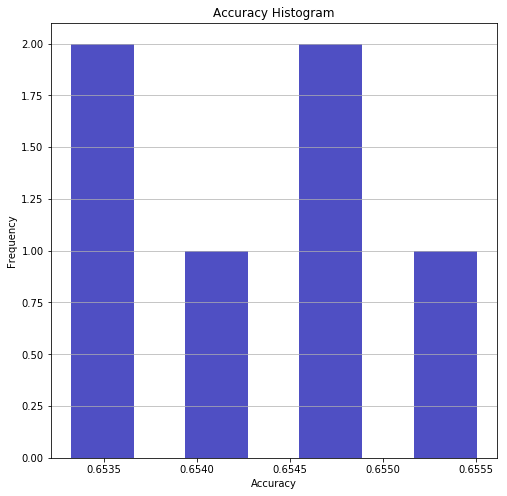

In [12]:
plt.figure(figsize=(8,8))
plt.hist(scores, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.55)                           
plt.grid(axis='y', alpha=0.90)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Accuracy Histogram')

As we can see, support vector machine allgorithm did not worked well with this dataset with linear kernel. That means, our dataset cannot be separated with a perfect linear hyperplane.

Support vector machine algorithm could user other kernels as well. For example, if we choose the kernel as rbf (Radial Basis Function) and run the model again:

In [8]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
scores = list()
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
for i in range(1,5):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y, train_size = 0.25)
    svc = SVC(kernel="rbf")
    svc.fit(x_train,y_train)
    y_pred = svc.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    scores.append(svc.score(x_test,y_test))

In [9]:
print("Confusion Matrix :")
print(cm)

Confusion Matrix :
[[173397   7981]
 [ 91518  11100]]


In [10]:
for i in scores:
    print("Score: " + str(i))

Score: 0.6497345033028634
Score: 0.6496499950703531
Score: 0.6497521091846364
Score: 0.6496464738939985


Text(0.5, 1.0, 'Accuracy Histogram')

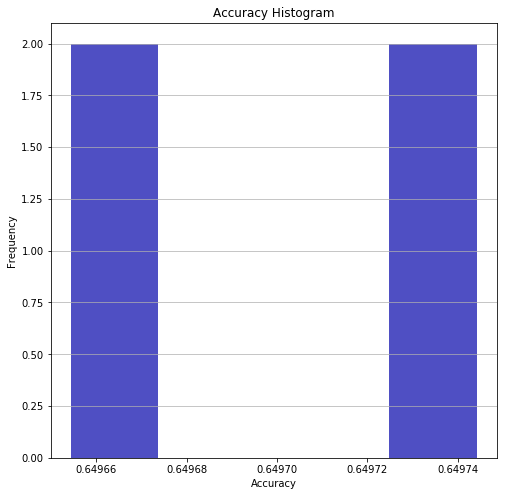

In [11]:
plt.figure(figsize=(8,8))
plt.hist(scores, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.55)                           
plt.grid(axis='y', alpha=0.90)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Accuracy Histogram')

Using rbf kernel didn't improve prediction performance. Let's try another kernel called <b>polynomial</b>:

In [13]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
scores = list()
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
for i in range(1,5):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y, train_size = 0.40)
    svc = SVC(kernel="poly")
    svc.fit(x_train,y_train)
    y_pred = svc.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    scores.append(svc.score(x_test,y_test))

In [14]:
print("Confusion Matrix :")
print(cm)

Confusion Matrix :
[[145298      0]
 [ 81899      0]]


In [15]:
for i in scores:
    print("Score: " + str(i))

Score: 0.6382610685880535
Score: 0.6392822088319828
Score: 0.6379881776607966
Score: 0.6395242894932591


<h1>Analysis</h1>

It is clearly seen that Decision Tree Algorithm did a better job on predicting states of projectswith 0.98 accuracy, while Logistic Regression and Support Vector Machine algorithms failed with nearly 0.65 accuracy. Main reason for that is, the dataset we have is not linearly separable. Decision Tree algorithm does not need the dataset to be linear.

<h3>What if we used any other attribute as an independent value?</h3><br><br>
For example duration of the campaign(in days). Let's see the graph of campaign duration and amount of the money pledged:

[(0, 100)]

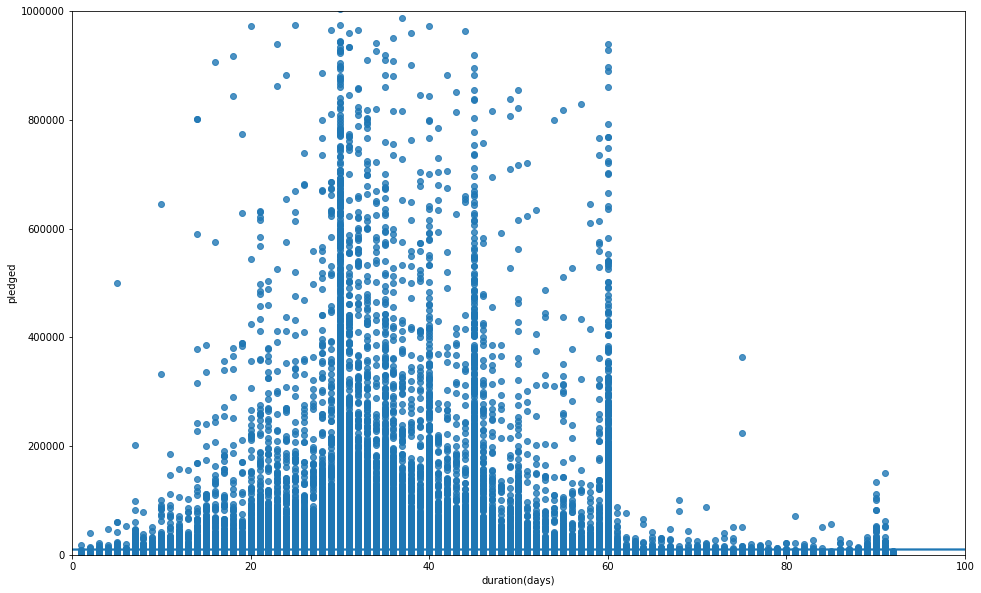

In [18]:
import seaborn as sns
data['deadline']=pd.to_datetime(data['deadline'], format="%Y/%m/%d").dt.date
data['launched']=pd.to_datetime(data['launched'], format="%Y/%m/%d").dt.date
data['duration(days)'] = (data['deadline'] - data['launched']).dt.days
plt.figure(figsize=(16, 10))
lm = sns.regplot(x='duration(days)',y='pledged', data=data)
lm.set(ylim=(0, 1000000))
lm.set(xlim=(0, 100))

It is clear that when duration of a campaign is between 20 - 60 days, it has a bigger chance of getting a high amount of money pledged.